### Import Packages

In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

print("Packages Imported")

Packages Imported


### Load Data

In [14]:
# LOAD DATA
print("\nLoading Files")
data_raw = pd.read_csv('output_sir_monte_carlo_train.csv', delimiter=',', header=None)
data_train = data_raw.to_numpy()
print("\nTraining File Loaded")

indx_p_start = np.where(data_train[0] == 666)[0][0]
indx_i_start = np.where(data_train[0] == 777)[0][0]
indx_end = np.where(data_train[0] == 999)[0][0]


Loading Files

Training File Loaded


### Process Data

In [19]:
n_days = 360
n_incre = 30

param_start = indx_p_start + 1
param_end = indx_i_start - indx_p_start

i_start = param_end + 1
i_end = i_start + n_days

y_data = data_train[:, param_start:param_end] # actual parameters value
y_data = np.delete(y_data, 2, axis=-1) # remove gamma info

x_raw = data_train[:, i_start:i_end]

N = 4500000
x_data = x_raw

# SPLIT TRAINING/TEST DATA
n_plot = 50

x_plot = x_data[:n_plot, ]
y_plot = y_data[:n_plot, ]

print("\nTraining Data:")
print("X: {0}".format(x_plot.shape))
print("Y: {0}".format(y_plot.shape))

print()
print("# \t n \t\t Beta")

for i in range(0, n_plot):
    print("{0} \t {1:.8f} \t {2:.8f}".format(i, y_plot[i, 0], y_plot[i, 1]))


Training Data:
X: (50, 360)
Y: (50, 2)

# 	 n 		 Beta
0 	 0.04154409 	 0.27871071
1 	 0.01910038 	 0.34413145
2 	 0.01425711 	 0.16033085
3 	 0.00406639 	 0.32431190
4 	 0.04976745 	 0.24104557
5 	 0.02259265 	 0.24875482
6 	 0.03635938 	 0.32726069
7 	 0.02946121 	 0.27000236
8 	 0.00753319 	 0.35451845
9 	 0.02776385 	 0.26824330
10 	 0.00743930 	 0.39304043
11 	 0.03516258 	 0.40913627
12 	 0.00394507 	 0.10508900
13 	 0.03365736 	 0.11433892
14 	 0.02978709 	 0.23676759
15 	 0.01543792 	 0.30754020
16 	 0.02608247 	 0.39852133
17 	 0.03934018 	 0.29079372
18 	 0.02390084 	 0.11412841
19 	 0.02070534 	 0.43959099
20 	 0.01959637 	 0.16390516
21 	 0.02623470 	 0.31101240
22 	 0.02943892 	 0.25879669
23 	 0.01498196 	 0.14950520
24 	 0.01431665 	 0.13595657
25 	 0.00469013 	 0.16247636
26 	 0.02542580 	 0.11502976
27 	 0.04704269 	 0.28684626
28 	 0.00371468 	 0.34572839
29 	 0.02875349 	 0.42410595
30 	 0.01833505 	 0.38550774
31 	 0.00353068 	 0.22270264
32 	 0.04082742 	 0.1101476

### Plot Results

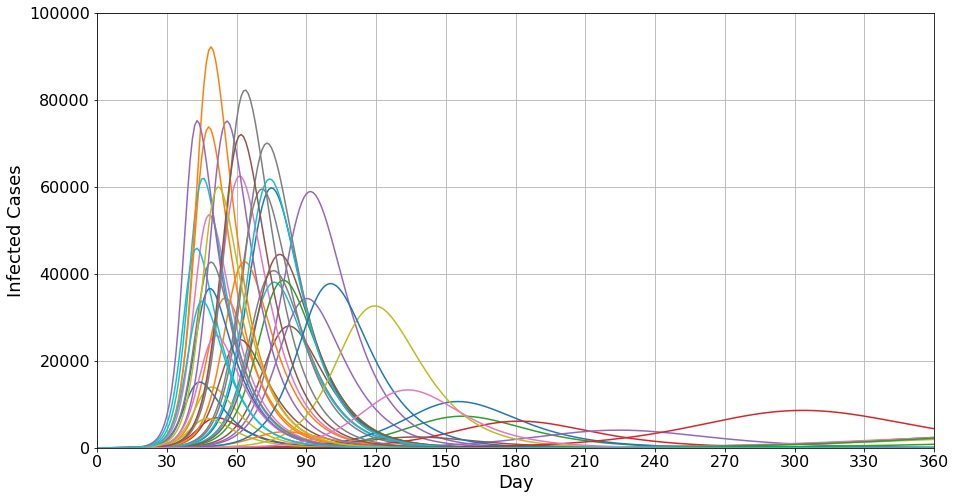

In [26]:
time_plot = np.linspace(1, n_days, num=n_days)
ticks_plot = np.linspace(0, n_days, num=int(n_days / n_incre) + 1)

plt.figure(figsize=(15,8))

for i in range(0, n_plot):
    plt.plot(time_plot, x_plot[i], linewidth=1.5)

plt.xlabel("Day", fontsize=18)
plt.ylabel("Infected Cases", fontsize=18)
plt.xticks(ticks_plot, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 360)
plt.ylim(0, 100000)
plt.grid()
plt.show()
